# ЦПТ своими руками
## Распределение Парето
https://ru.wikipedia.org/wiki/Распределение_Парето

In [80]:

from scipy.stats import pareto
from scipy.stats import norm 
import matplotlib.pyplot as plt
import numpy as np

In [74]:
#параметр для распределения Парето
b=2.42

In [221]:
x = np.linspace(pareto.ppf(0.01, b),pareto.ppf(0.99, b), 100)#определяем значения x
r = pareto.rvs(b, size=1000)#выборка объемом 1000

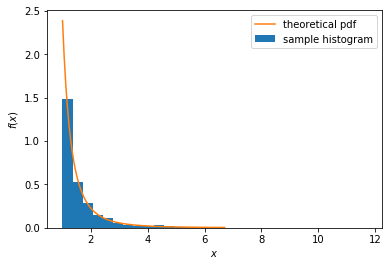

In [222]:
#построение гистограммы с теоретической плотностью распределения.
plt.hist(r,density=True,bins=30,label = 'sample histogram')
plt.plot(x, pareto.pdf(x, b),label='theoretical pdf')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()


## Оценка распределения выборочного среднего случайной величины при разных объёмах выборок

Используя статью из Википедии берем формулы для расчета Ex b Dx:


**Ex=b/(b-1)
Dx=(1/(b-1))*/*2 * b/(b-2)

In [223]:
Ex = b/(b-1)
Dx = ((1/(b-1))**2) * (b/(b-2))

In [238]:
def ShowHist(n):
    
    xs = np.linspace(1,6,1000)
    
    sample=pareto.rvs(b,loc=0,scale=1,size=(1000,n))#1000 выборок объёма n
    
    plt.hist(sample.mean(axis=1),density=True,bins=30,label='sample histogram')#построение гистограммы по усредненному значению
    plt.plot(xs,norm(Ex,np.sqrt(Dx/(2*n))).pdf(xs),label='theoretical distribution density')#нормальное распределение
    
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    plt.title("n = %d" % n)
    plt.legend()
    plt.show()

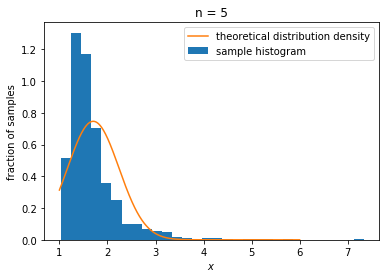

In [245]:

ShowHist(5)

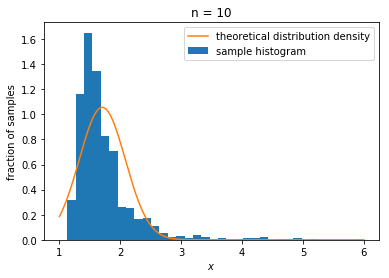

In [244]:
ShowHist(10)

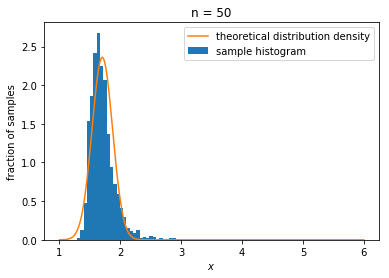

In [246]:
ShowHist(50)

## Вывод

При увеличении значения n, график средних значений все больше начинает напоминать нормальное распределение.

In [248]:
import math

In [250]:
def Puason(k,l):
    return (l**k)/(math.factorial(k)*math.e**l)

In [257]:
summa =0
for i in range(5):
    summa += Puason(i,3)
1-summa

0.1847367554762278